# Cargue de Datos para el Modelo Lasso_Ridg_Regresión_Logistica

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


ruta = r'C:/Users/wmanj/OneDrive/Escritorio/MACHINELEARNING/tornados.csv'  
df = pd.read_csv(ruta) 
df['loss'] = df['loss'].replace(0, pd.NA)
df['loss'] = df['loss'].interpolate(method='linear')
df['mag'] = df['mag'].fillna(df['mag'].mean())
df.isnull().sum()

om              0
yr              0
mo              0
dy              0
date            0
time            0
tz              0
datetime_utc    0
st              0
stf             0
mag             0
inj             0
fat             0
loss            0
slat            0
slon            0
elat            0
elon            0
len             0
wid             0
ns              0
sn              0
f1              0
f2              0
f3              0
f4              0
fc              0
dtype: int64

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definir X y y (asegúrate de que ya tienes estas variables previamente definidas)
X = df[['mag', 'slat', 'slon', 'elat', 'elon', 'len', 'wid','fat','f1', 'f2', 'f3', 'f4','loss']]
y = df['inj']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal
lr = LinearRegression().fit(X_train, y_train)

# Mostrar los coeficientes y el intercepto del modelo
print("Coeficientes del modelo:", lr.coef_)
print("Intercepto del modelo:", lr.intercept_)

# Hacer predicciones con el modelo en el conjunto de prueba
y_pred = lr.predict(X_test)

# Evaluar el modelo con la puntuación R^2 (coeficiente de determinación)
r2_score = lr.score(X_test, y_test)
print(f"Puntuación R^2 en el conjunto de prueba: {r2_score}")


Coeficientes del modelo: [ 1.03933097e+00 -2.34167006e-02  5.48057092e-03  1.67695299e-02
  1.01654786e-02  1.32225799e-01  8.84202034e-04  7.64548959e+00
 -6.75772303e-04  9.71291867e-04  1.96154227e-03  9.77616370e-03
  1.14162944e-07]
Intercepto del modelo: 0.8017899647209744
Puntuación R^2 en el conjunto de prueba: 0.6574705265235996


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Convertir 'inj' a binario si no lo es (ej: 0=no heridos, 1=heridos)
y_binary = (y > 0).astype(int)  # Ajusta según tu contexto

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Modelo con penalización L1 (Lasso) o L2 (Ridge)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0).fit(X_train, y_train)  # L1
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0).fit(X_train, y_train)  # L2

# Evaluación
print("Precisión (L1):", accuracy_score(y_test, model_l1.predict(X_test)))
print("Reporte (L1):\n", classification_report(y_test, model_l1.predict(X_test)))
print("Precisión (L2):", accuracy_score(y_test, model_l2.predict(X_test)))
print("Reporte (L2):\n", classification_report(y_test, model_l2.predict(X_test)))


Precisión (L1): 0.9091636945920373
Reporte (L1):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     12219
           1       0.69      0.33      0.44      1520

    accuracy                           0.91     13739
   macro avg       0.81      0.65      0.70     13739
weighted avg       0.90      0.91      0.89     13739

Precisión (L2): 0.8906033918043526
Reporte (L2):
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12219
           1       0.53      0.10      0.16      1520

    accuracy                           0.89     13739
   macro avg       0.71      0.54      0.55     13739
weighted avg       0.86      0.89      0.86     13739



In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.model_selection import GridSearchCV

# Ejemplo para Regresión Logística con L1
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)  # Usar datos escalados

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación (R²/Accuracy):", grid_search.best_score_)

Mejores parámetros: {'C': 1, 'penalty': 'l1'}
Mejor puntuación (R²/Accuracy): 0.9072132886622681


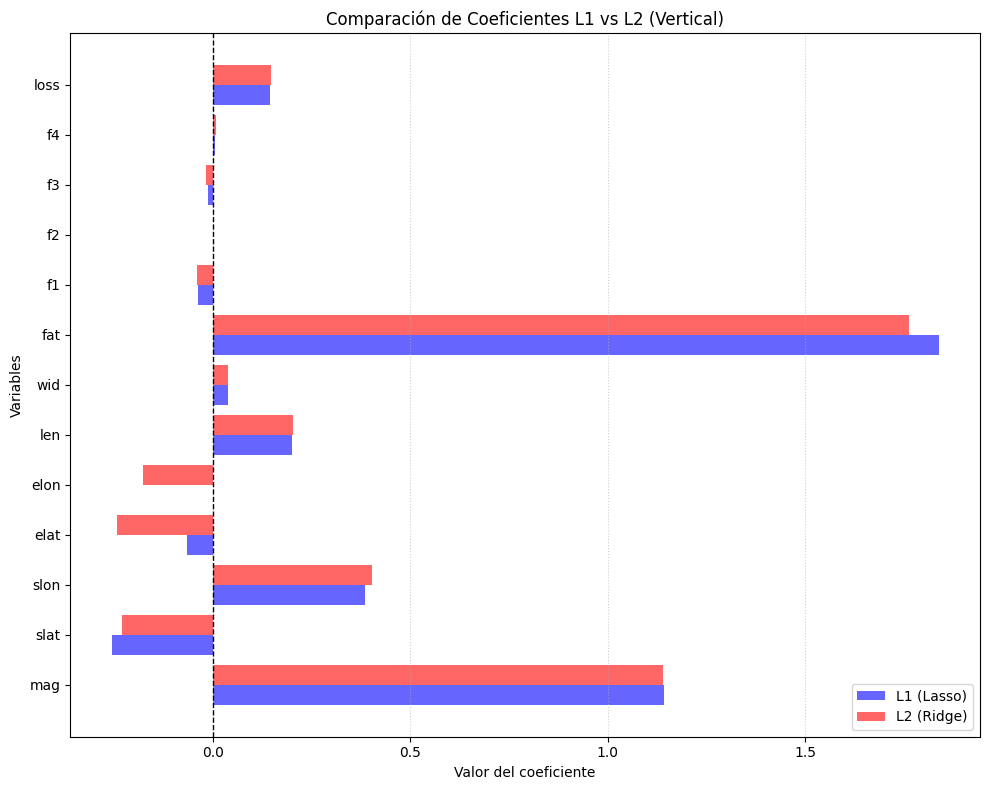

In [17]:
import matplotlib.pyplot as plt

# Modelos entrenados
model_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear').fit(X_train_scaled, y_train)
model_l2 = LogisticRegression(penalty='l2', C=0.1, solver='liblinear').fit(X_train_scaled, y_train)

# Configurar el gráfico vertical
plt.figure(figsize=(10, 8))  # Ajustar tamaño para mejor visualización

# Posiciones en el eje Y
y_pos = range(len(X.columns))

# Barras horizontales
plt.barh(y_pos, model_l1.coef_[0], height=0.4, color='blue', alpha=0.6, label='L1 (Lasso)', align='center')
plt.barh([y + 0.4 for y in y_pos], model_l2.coef_[0], height=0.4, color='red', alpha=0.6, label='L2 (Ridge)', align='center')

# Etiquetas y diseño
plt.yticks([y + 0.2 for y in y_pos], X.columns)  # Centrar etiquetas entre barras
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Valor del coeficiente')
plt.ylabel('Variables')
plt.title('Comparación de Coeficientes L1 vs L2 (Vertical)')
plt.legend(loc='lower right')  # Ubicación de la leyenda
plt.grid(axis='x', linestyle=':', alpha=0.6)  # Líneas de guía verticales
plt.tight_layout()  # Ajustar márgenes

plt.show()

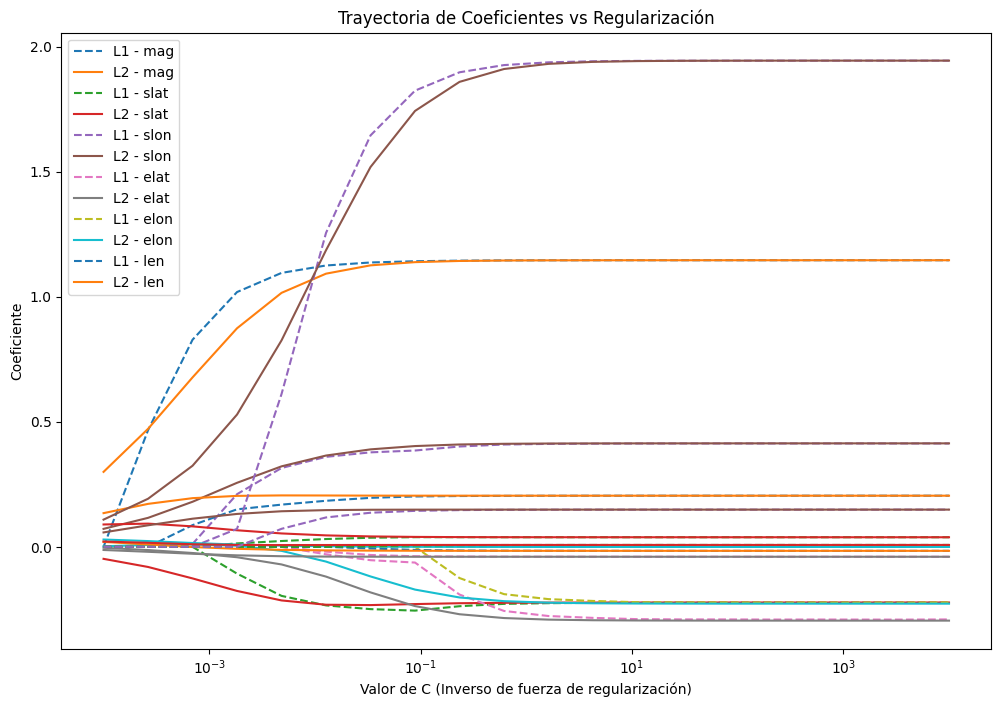

In [16]:
import numpy as np

C_values = np.logspace(-4, 4, 20)
coefs_l1, coefs_l2 = [], []
for C in C_values:
    l1 = LogisticRegression(penalty='l1', C=C, solver='liblinear').fit(X_train_scaled, y_train)
    l2 = LogisticRegression(penalty='l2', C=C, solver='liblinear').fit(X_train_scaled, y_train)
    coefs_l1.append(l1.coef_[0])
    coefs_l2.append(l2.coef_[0])

# Gráfico de evolución de coeficientes
plt.figure(figsize=(12, 8))
for i, col in enumerate(X.columns):
    plt.semilogx(C_values, [coef[i] for coef in coefs_l1], '--', label=f'L1 - {col}' if i < 6 else "")
    plt.semilogx(C_values, [coef[i] for coef in coefs_l2], '-', label=f'L2 - {col}' if i < 6 else "")
plt.xlabel("Valor de C (Inverso de fuerza de regularización)")
plt.ylabel("Coeficiente")
plt.title("Trayectoria de Coeficientes vs Regularización")
plt.legend(loc='upper left')
plt.show()

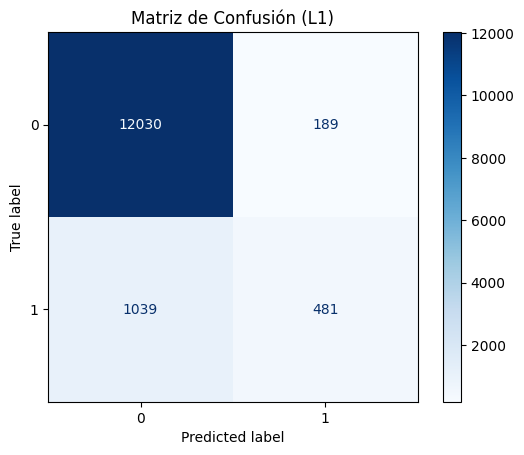

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, model_l1.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (L1)")
plt.show()

In [14]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler

# Normalizar datos (requerido para modelos penalizados)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar Elastic Net (L1 + L2)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_scaled, y)

# Obtener coeficientes y variables eliminadas (coef = 0)
coeficientes = elastic_net.coef_
variables_eliminadas = X.columns[coeficientes == 0]  # Variables con peso 0

print("Variables eliminadas por L1 (coeficiente = 0):")
print(variables_eliminadas.tolist())

Variables eliminadas por L1 (coeficiente = 0):
['slat', 'elat', 'f2', 'f4']


In [15]:
from sklearn.linear_model import Lasso, Ridge

# Entrenar Lasso (L1) y Ridge (L2)
lasso = Lasso(alpha=0.1).fit(X_scaled, y)
ridge = Ridge(alpha=0.1).fit(X_scaled, y)

# Dataframe comparativo
import pandas as pd
df_coef = pd.DataFrame({
    'Variable': X.columns,
    'Lasso (L1)': lasso.coef_,
    'Ridge (L2)': ridge.coef_,
    'ElasticNet': elastic_net.coef_
})

print("Comparación de coeficientes:")
print(df_coef[df_coef['Lasso (L1)'] == 0])  # Variables eliminadas solo por L1

Comparación de coeficientes:
   Variable  Lasso (L1)  Ridge (L2)  ElasticNet
1      slat        -0.0   -0.107442   -0.000000
3      elat        -0.0    0.423810   -0.000000
8        f1        -0.0   -0.077614   -0.019149
9        f2         0.0    0.026335    0.000000
10       f3         0.0    0.031032    0.009142
11       f4         0.0   -0.018656    0.000000


AUC (L1): 0.8785
AUC (L2): 0.7615


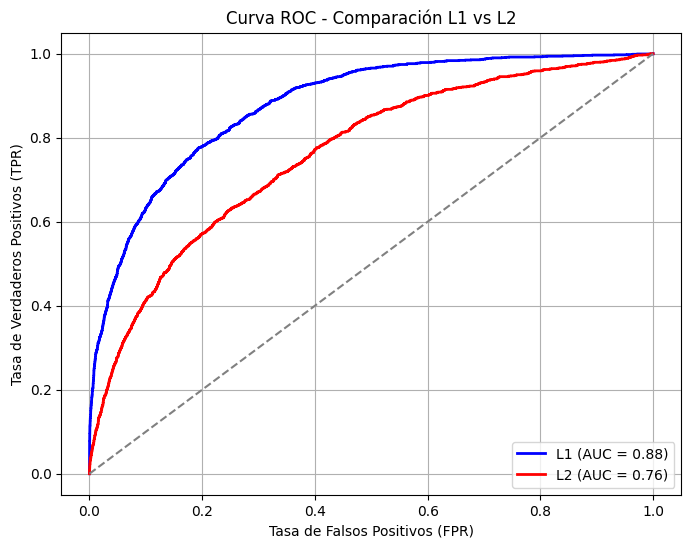

In [19]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Calcular probabilidades predichas (no las clases)
y_prob_l1 = model_l1.predict_proba(X_test)[:, 1]  # Probabilidades para clase 1 (L1)
y_prob_l2 = model_l2.predict_proba(X_test)[:, 1]  # Probabilidades para clase 1 (L2)

# Calcular AUC
auc_l1 = roc_auc_score(y_test, y_prob_l1)
auc_l2 = roc_auc_score(y_test, y_prob_l2)

print(f"AUC (L1): {auc_l1:.4f}")
print(f"AUC (L2): {auc_l2:.4f}")

# Generar curvas ROC
fpr_l1, tpr_l1, _ = roc_curve(y_test, y_prob_l1)
fpr_l2, tpr_l2, _ = roc_curve(y_test, y_prob_l2)

# Graficar curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_l1, tpr_l1, color='blue', lw=2, label=f'L1 (AUC = {auc_l1:.2f})')
plt.plot(fpr_l2, tpr_l2, color='red', lw=2, label=f'L2 (AUC = {auc_l2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Comparación L1 vs L2')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()